In [1]:
import pandas as pd
import numpy as np

import matplotlib.pylab as plt

import camelot

In [3]:
data = pd.read_csv("./data/data_corona_varianten.txt",
            infer_datetime_format=True,
            delimiter=" ")

In [4]:
pd.to_datetime(data.Timestamp, infer_datetime_format=True)

0   2021-08-02 16:00:00
1   2021-09-02 16:00:00
2   2021-10-02 16:00:00
3   2021-11-02 16:00:00
4   2021-12-02 16:00:00
5   2021-02-13 16:00:00
6   2021-02-14 16:00:00
Name: Timestamp, dtype: datetime64[ns]

In [5]:
data

,Timestamp,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80-89,90+
0,"08.02.2021,16:00",51,106,151,179,181,210,106,43,41,13
1,"09.02.2021,16:00",56,117,178,206,206,244,127,50,45,17
2,"10.02.2021,16:00",61,127,191,202,213,236,119,43,30,10
3,"11.02.2021,16:00",66,141,212,223,243,262,126,53,34,10
4,"12.02.2021,16:00",76,168,241,253,281,312,139,56,38,11
5,"13.02.2021,16:00",83,185,266,278,306,351,151,66,48,13
6,"14.02.2021,16:00",87,192,279,292,310,360,161,66,48,14


In [6]:
data.keys()

Index(['Timestamp', '0-9', '10-19', '20-29', '30-39', '40-49', '50-59',
       '60-69', '70-79', '80-89', '90+'],
      dtype='object')

In [7]:
age_groups = data.keys()[1:]

In [8]:
age_groups

Index(['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79',
       '80-89', '90+'],
      dtype='object')

In [20]:
Y_MAX = data[age_groups].max(axis=0).max()

In [21]:
data['sum']=data.sum(axis=1)

plot der tages-Daten

In [22]:
data['sum'][1]

2492

0


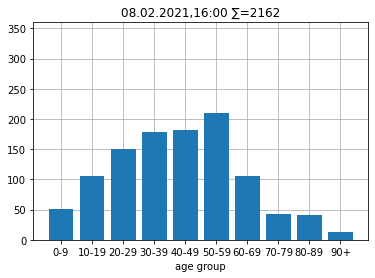

1


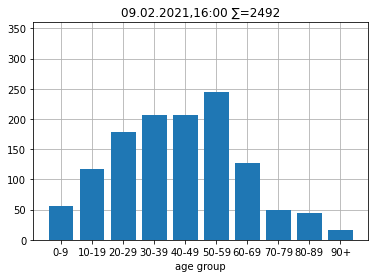

2


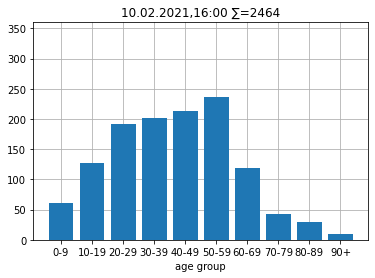

3


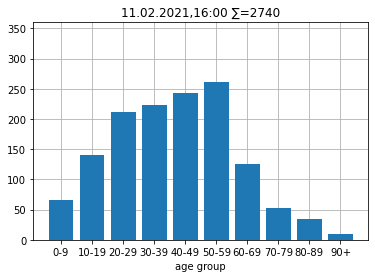

4


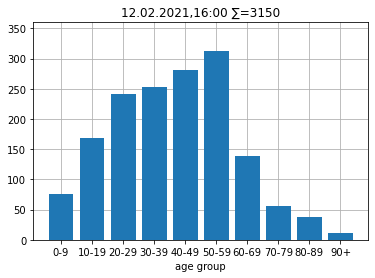

5


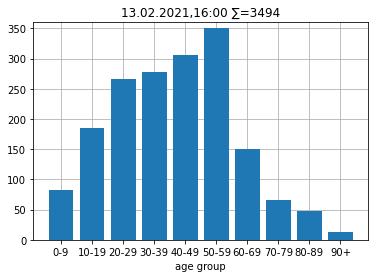

6


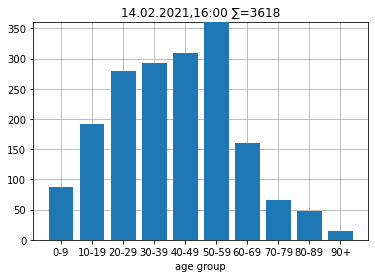

In [23]:
for i in range(data.index[-1]+1):
    print(i)
    cur_height = np.array(data.loc[i][age_groups])
    plt.bar(age_groups, 
            height=cur_height,
           zorder=999)
    plt.grid(True)
    plt.xlabel('age group')
    plt.ylim(0.,Y_MAX)
    plt.title(data.loc[i][0] + f" ∑={data['sum'][i]}")
    plt.show()
    plt.close()

Plot des Zuwachses

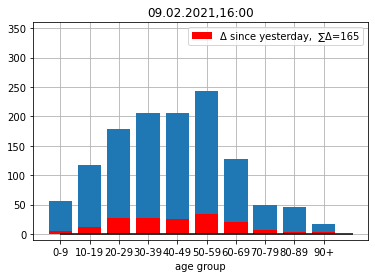

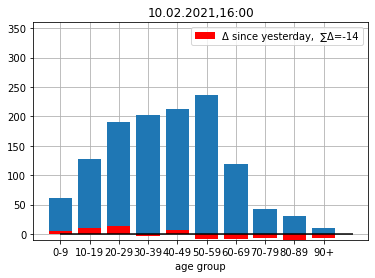

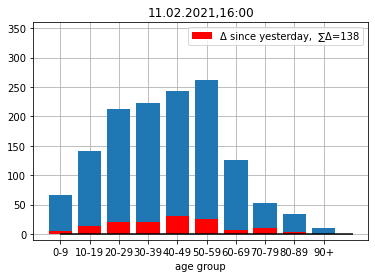

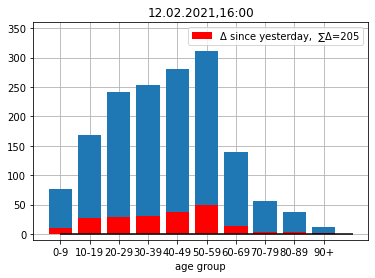

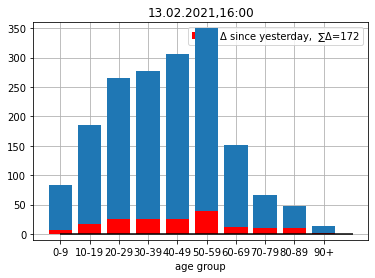

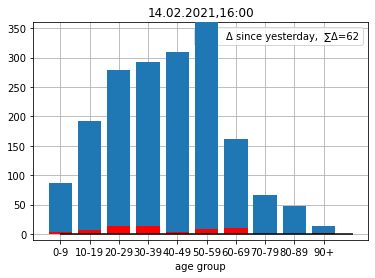

In [24]:
for i in np.arange(start=1, stop=data.index[-1]+1):
    # print(i)
    cur_height = np.array(data.loc[i][age_groups])
    # print(cur_height)
    prev_height = np.array(data.loc[i-1][age_groups])
    # print(prev_height)
    Δ = cur_height - prev_height
    # print(bottom)
    sum_delta = Δ.sum()

    
    # plot current height
    plt.bar(age_groups, 
            height=cur_height,
           zorder=995)
    # plot change since last time
    plt.bar(age_groups, 
            height=Δ,
            bottom=0,
            color='red',
           zorder=998,
           label=f"Δ since yesterday,  ∑Δ={Δ.sum()}")
    plt.hlines(0,0,10,  colors='k', zorder=999)
    plt.grid(True)
    plt.xlabel('age group')
    plt.ylim(-10.,Y_MAX)
    plt.title(data.loc[i][0])
    plt.legend(loc='best')
    plt.show()
    plt.close()

## Evolution over Time

In [65]:
data

,Timestamp,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80-89,90+,sum
0,"08.02.2021,16:00",51,106,151,179,181,210,106,43,41,13,2162
1,"09.02.2021,16:00",56,117,178,206,206,244,127,50,45,17,2492
2,"10.02.2021,16:00",61,127,191,202,213,236,119,43,30,10,2464
3,"11.02.2021,16:00",66,141,212,223,243,262,126,53,34,10,2740
4,"12.02.2021,16:00",76,168,241,253,281,312,139,56,38,11,3150
5,"13.02.2021,16:00",83,185,266,278,306,351,151,66,48,13,3494
6,"14.02.2021,16:00",87,192,279,292,310,360,161,66,48,14,3618


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

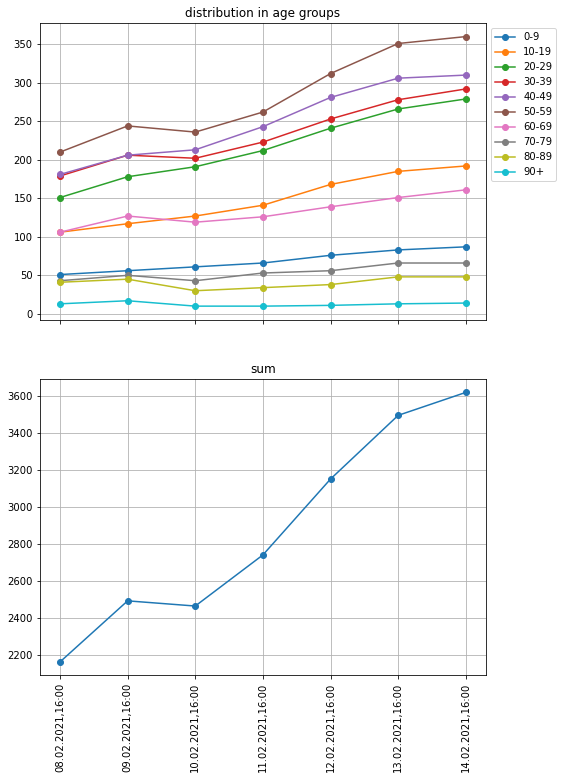

In [64]:
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(8,12))
for cur_age in age_groups:
    age_plot = ax[0].plot(data["Timestamp"],
                          data[cur_age],
                          "o-",
                          label=cur_age,
                          )

ax[0].legend(bbox_to_anchor=(1,1), loc="upper left")
ax[0].grid(True)
ax[0].title.set_text("distribution in age groups")

# plot the sum
ax[1].plot(data["Timestamp"],
          data["sum"],
          "o-",)
ax[1].grid(True)
ax[1].title.set_text("sum")
plt.setp(ax[1].xaxis.get_majorticklabels(), rotation=90)

In [43]:
data[["Timestamp","sum"]]

,Timestamp,sum
0,"08.02.2021,16:00",2162
1,"09.02.2021,16:00",2492
2,"10.02.2021,16:00",2464
3,"11.02.2021,16:00",2740
4,"12.02.2021,16:00",3150
5,"13.02.2021,16:00",3494
6,"14.02.2021,16:00",3618


read from PDF

In [3]:
pdfobject=open('210208_COVID_Tagesbericht_LGA.pdf','rb')

In [7]:
pdf=pypdf.PdfFileReader(pdfobject)

In [15]:
pdf.pages

In [7]:
tables = camelot.read_pdf('210208_COVID_Tagesbericht_LGA.pdf')

RuntimeError: Please make sure that Ghostscript is installed

In [ ]:
!gs

GPL Ghostscript 9.22 (2017-10-04)
Copyright (C) 2017 Artifex Software, Inc.  All rights reserved.
This software comes with NO WARRANTY: see the file PUBLIC for details.
GS>